In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Wihtout Chauvenet

In [2]:
df = pd.read_csv('../Reading/relative_error.csv')
df = df.apply(lambda x: x.sort_values().values)
list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))


df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'pH', 'value']
df_melt

,index,pH,value
0,0,pH 2.17,-0.737327
1,1,pH 2.17,-0.737327
2,2,pH 2.17,-0.691244
3,3,pH 2.17,-0.552995
4,4,pH 2.17,-0.506912
...,...,...,...
4995,995,pH 13.15,0.320152
4996,996,pH 13.15,0.329278
4997,997,pH 13.15,0.333840
4998,998,pH 13.15,0.362738


h:\Bagas\Code\All\Monitoring IoT Fish Farm\env\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


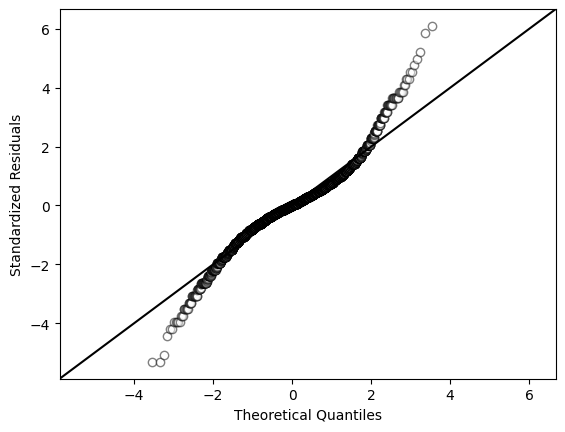

In [7]:
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='pH', anova_model='value ~ C(pH)')
pp = sm.ProbPlot(res.anova_std_residuals, fit=True)
qq = pp.qqplot(marker='o', markerfacecolor='w', markeredgecolor='k', alpha=0.5)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig('../reading/img/QQ Plot.png')
plt.show()

# With Chauvenet

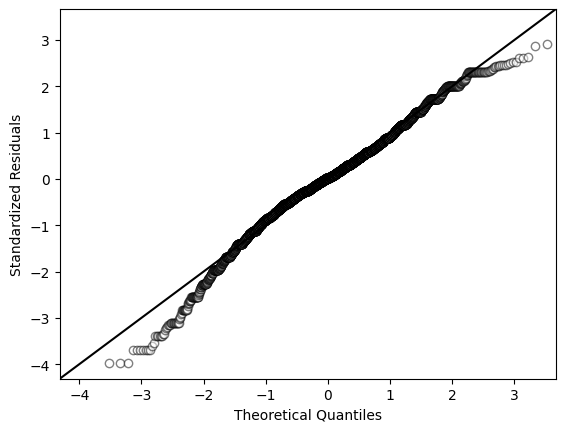

In [8]:
df_melt = pd.read_csv('../Reading/Remove Outlier Chauvenet.csv')
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='pH', anova_model='value ~ C(pH)')
pp = sm.ProbPlot(res.anova_std_residuals, fit=True)
qq = pp.qqplot(marker='o', markerfacecolor='w', markeredgecolor='k', alpha=0.5)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig('../reading/img/QQ Plot Remove Outlier.png')
plt.show()

Text(42.722222222222214, 0.5, 'Probability Density')

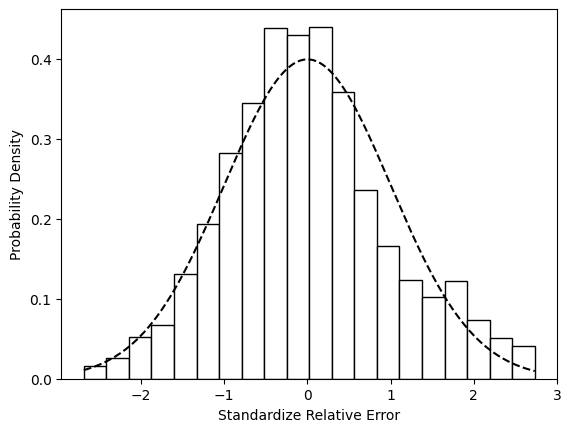

In [12]:
df_melt['z-score'] = (df_melt['value'] - df_melt['value'].mean()) / df_melt['value'].std()
plt.plot(df_melt['z-score'].sort_values(), stats.norm.pdf(df_melt['z-score'].sort_values(), df_melt['z-score'].mean(), df_melt['z-score'].std()), color='k', linestyle='--')
plt.hist(df_melt['z-score'].sort_values(), density=True, edgecolor='k', color='w', bins=20)
plt.xlabel('Standardize Relative Error')
plt.savefig('../Reading/img/distribution_normal_chauvenet_relative_error_all.png')
plt.ylabel('Probability Density')

In [19]:
df_melt['value'].sem() * 2

0.005527215016710262

In [18]:
df_melt['value'].max() - df_melt['value'].min()

1.0321378481266208